In [1]:
import pandas as pd
df = pd.read_csv('df_3.csv')
df = df.drop(df.columns[0], axis=1)

In [2]:
# 添加一个名为 'label' 的列，并将前80行的值设为 0，其余的设为 1
df['label'] = 0
df.loc[80:, 'label'] = 1
# 将 'label' 列移动到数据集的第一列
df = df[['label'] + [col for col in df.columns if col != 'label']]

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 1. 计算每个特征的平均值
mean_values = df.mean()

# 2. 将异常值替换为平均值
df_no_outliers = df.copy()
for column in df_no_outliers.columns:
    column_mean = mean_values[column]
    column_std = df_no_outliers[column].std()
    outlier_indices = (df_no_outliers[column] - column_mean).abs() > 3 * column_std  # 假设使用 3 倍标准差作为异常值的阈值
    df_no_outliers.loc[outlier_indices, column] = column_mean

# 3. 使用 StandardScaler 或 MinMaxScaler 对特征进行归一化
scaler = MinMaxScaler()  # 或者使用 MinMaxScaler()

# 提取特征和标签
X = df_no_outliers.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_no_outliers.iloc[:, 0]

# 对特征进行归一化
scaled_features = scaler.fit_transform(X)

# 构建归一化后的 DataFrame
df_standard = pd.DataFrame(scaled_features, columns=X.columns)

# 将标签添加回 DataFrame
df_standard.insert(0, 'label', y)

# 输出归一化后的 DataFrame
df_standard

C:\Users\sjq397\AppData\Local\Temp\ipykernel_24268\1510870738.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.8214285714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[outlier_indices, column] = column_mean
C:\Users\sjq397\AppData\Local\Temp\ipykernel_24268\1510870738.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '820.71875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[outlier_indices, column] = column_mean


,label,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,...,PF,BW,SE,PermEn,SamPen,FuzzyEn,ApEn,AMAX,PMI,HFMI
0,0.0,0.038520,0.025481,0.002017,0.065403,0.627336,0.635562,0.616777,0.003061,0.025481,...,0.338798,0.580952,0.001809,0.757324,0.006914,0.012794,0.003335,0.030403,0.804040,0.073009
1,0.0,0.085005,0.058080,0.005297,0.091581,0.483937,0.476814,0.453620,0.005946,0.058080,...,0.885246,0.380952,0.007134,0.391254,0.020663,0.024038,0.007889,0.053688,0.282520,0.143227
2,0.0,0.143543,0.163072,0.022090,0.217891,0.698598,0.704979,0.576668,0.034320,0.163072,...,0.344262,0.190476,0.027451,0.485712,0.156926,0.200450,0.028058,0.186878,0.095396,0.388152
3,0.0,0.039928,0.042985,0.003706,0.055155,0.578271,0.572404,0.540227,0.005026,0.042985,...,0.333333,0.419048,0.003722,0.857894,0.018239,0.026091,0.007272,0.071346,0.106542,0.346362
4,0.0,0.024893,0.033282,0.002732,0.041495,0.609813,0.601138,0.537269,0.003742,0.033282,...,0.557377,0.471429,0.002792,0.688064,0.018087,0.033038,0.007194,0.055988,0.105392,0.394089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1.0,0.183397,0.139865,0.081867,0.197338,0.151577,0.166714,0.492530,0.088395,0.139865,...,0.721311,0.623810,0.111727,0.881547,0.068770,0.086149,1.000000,0.121097,0.530924,0.197220
444,1.0,0.270953,0.127051,0.015659,0.170773,0.214953,0.204552,0.253904,0.012150,0.127050,...,0.699454,0.600000,0.016465,0.497170,0.011589,0.010662,0.011689,0.030903,0.746449,0.021727
445,1.0,0.183397,0.139865,0.081867,0.197338,0.393692,0.418492,0.000000,0.088395,0.139865,...,0.327869,0.380952,0.111727,0.649086,0.068770,0.086149,0.006787,0.121097,0.258755,0.312959
446,1.0,0.213385,0.167735,0.023032,0.244487,0.513143,0.502134,0.499882,0.029559,0.167735,...,0.278689,0.342857,0.028485,0.738232,0.044513,0.070603,0.017851,0.156099,0.149935,0.153985


In [25]:
df_t = df_standard.iloc[:, 1:22]
# 添加一个名为 'label' 的列，并将前80行的值设为 0，其余的设为 1
df_t['label'] = 0
df_t.loc[80:, 'label'] = 1
# 将 'label' 列移动到数据集的第一列
df_t = df_t[['label'] + [col for col in df_t.columns if col != 'label']]
df_t

,label,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,...,CARD,COV,DAMV,DASDV,DVARV,IQR,KURT,LTKEO,MAD,SKEW
0,0,0.038520,0.025481,0.002017,0.065403,0.627336,0.635562,0.616777,0.003061,0.025481,...,0.654162,1.000000,0.038023,0.023546,0.001750,0.110431,0.208195,0.147510,0.038518,0.587577
1,0,0.085005,0.058080,0.005297,0.091581,0.483937,0.476814,0.453620,0.005946,0.058080,...,0.474795,0.541481,0.091725,0.065113,0.005902,0.174550,0.227961,0.319852,0.085003,0.489366
2,0,0.143543,0.163072,0.022090,0.217891,0.698598,0.704979,0.576668,0.034320,0.163072,...,0.716295,0.537080,0.137515,0.143312,0.017752,0.195612,0.513140,0.545458,0.143542,0.468690
3,0,0.039928,0.042985,0.003706,0.055155,0.578271,0.572404,0.540227,0.005026,0.042985,...,0.594373,0.549682,0.038852,0.040126,0.003266,0.094527,0.477679,0.210650,0.039930,0.512208
4,0,0.024893,0.033282,0.002732,0.041495,0.609813,0.601138,0.537269,0.003742,0.033282,...,0.604924,0.601725,0.026597,0.031632,0.002426,0.062487,0.394873,0.178821,0.024892,0.481569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,0.183397,0.139865,0.081867,0.197338,0.151577,0.166714,0.492530,0.088395,0.139865,...,0.175850,0.559163,0.182479,0.134797,0.078499,0.317470,0.156629,0.392853,0.183396,0.310992
444,1,0.270953,0.127051,0.015659,0.170773,0.214953,0.204552,0.253904,0.012150,0.127050,...,0.213365,0.547351,0.274453,0.126589,0.015116,0.593097,0.000582,0.395664,0.270948,0.479000
445,1,0.183397,0.139865,0.081867,0.197338,0.393692,0.418492,0.000000,0.088395,0.139865,...,0.431419,0.242105,0.182479,0.134797,0.078499,0.317470,0.208427,0.392853,0.183396,0.224661
446,1,0.213385,0.167735,0.023032,0.244487,0.513143,0.502134,0.499882,0.029559,0.167735,...,0.534584,0.519593,0.207238,0.151689,0.019315,0.377423,0.404465,0.531029,0.213382,0.365663


In [26]:
df_f = df_standard.iloc[:, 22:25]
# 添加一个名为 'label' 的列，并将前80行的值设为 0，其余的设为 1
df_f['label'] = 0
df_f.loc[80:, 'label'] = 1
# 将 'label' 列移动到数据集的第一列
df_f = df_f[['label'] + [col for col in df_f.columns if col != 'label']]
df_f

,label,PF,BW,SE
0,0,0.338798,0.580952,0.001809
1,0,0.885246,0.380952,0.007134
2,0,0.344262,0.190476,0.027451
3,0,0.333333,0.419048,0.003722
4,0,0.557377,0.471429,0.002792
...,...,...,...,...
443,1,0.721311,0.623810,0.111727
444,1,0.699454,0.600000,0.016465
445,1,0.327869,0.380952,0.111727
446,1,0.278689,0.342857,0.028485


In [27]:
df_s = df_standard.iloc[:, 25:29]
# 添加一个名为 'label' 的列，并将前80行的值设为 0，其余的设为 1
df_s['label'] = 0
df_s.loc[80:, 'label'] = 1
# 将 'label' 列移动到数据集的第一列
df_s = df_s[['label'] + [col for col in df_s.columns if col != 'label']]
df_s

,label,PermEn,SamPen,FuzzyEn,ApEn
0,0,0.757324,0.006914,0.012794,0.003335
1,0,0.391254,0.020663,0.024038,0.007889
2,0,0.485712,0.156926,0.200450,0.028058
3,0,0.857894,0.018239,0.026091,0.007272
4,0,0.688064,0.018087,0.033038,0.007194
...,...,...,...,...,...
443,1,0.881547,0.068770,0.086149,1.000000
444,1,0.497170,0.011589,0.010662,0.011689
445,1,0.649086,0.068770,0.086149,0.006787
446,1,0.738232,0.044513,0.070603,0.017851


In [28]:
df_x = df_standard.iloc[:, 29:]
# 添加一个名为 'label' 的列，并将前80行的值设为 0，其余的设为 1
df_x['label'] = 0
df_x.loc[80:, 'label'] = 1
# 将 'label' 列移动到数据集的第一列
df_x = df_x[['label'] + [col for col in df_x.columns if col != 'label']]
df_x

,label,AMAX,PMI,HFMI
0,0,0.030403,0.804040,0.073009
1,0,0.053688,0.282520,0.143227
2,0,0.186878,0.095396,0.388152
3,0,0.071346,0.106542,0.346362
4,0,0.055988,0.105392,0.394089
...,...,...,...,...
443,1,0.121097,0.530924,0.197220
444,1,0.030903,0.746449,0.021727
445,1,0.121097,0.258755,0.312959
446,1,0.156099,0.149935,0.153985


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Feature 'MAV': p-value = 8.370351682812508e-05
Feature 'RMS': p-value = 0.4436255328235086
Feature 'VAR': p-value = 0.06463764812851076
Feature 'WL': p-value = 0.020551617947247466
Feature 'ZC': p-value = 2.8835046380305992e-08
Feature 'SSC': p-value = 3.782973465900741e-08
Feature 'WAMP': p-value = 0.011510854857404221
Feature 'SSI': p-value = 0.03365124929353092
Feature 'SD': p-value = 0.44361855974593734
Feature 'ASM': p-value = 0.019124925333621454
Feature 'ASS': p-value = 0.18142176229127138
Feature 'CARD': p-value = 7.757904588430025e-08
Feature 'COV': p-value = 0.7421187441195162
Feature 'DAMV': p-value = 0.00010346160498020302
Feature 'DASDV': p-value = 0.4393503392758058
Feature 'DVARV': p-value = 0.061135096908159985
Feature 'IQR': p-value = 3.4283743706712745e-09
Feature 'KURT': p-value = 3.316880697716457e-17
Feature 'LTKEO': p-value = 0.3297902544274244
Feature 'MAD': p-value = 8.370094264246628e-05
Feature 'SKEW': p-value = 0.3711141423612807
Feature 'PF': p-value = 0.157

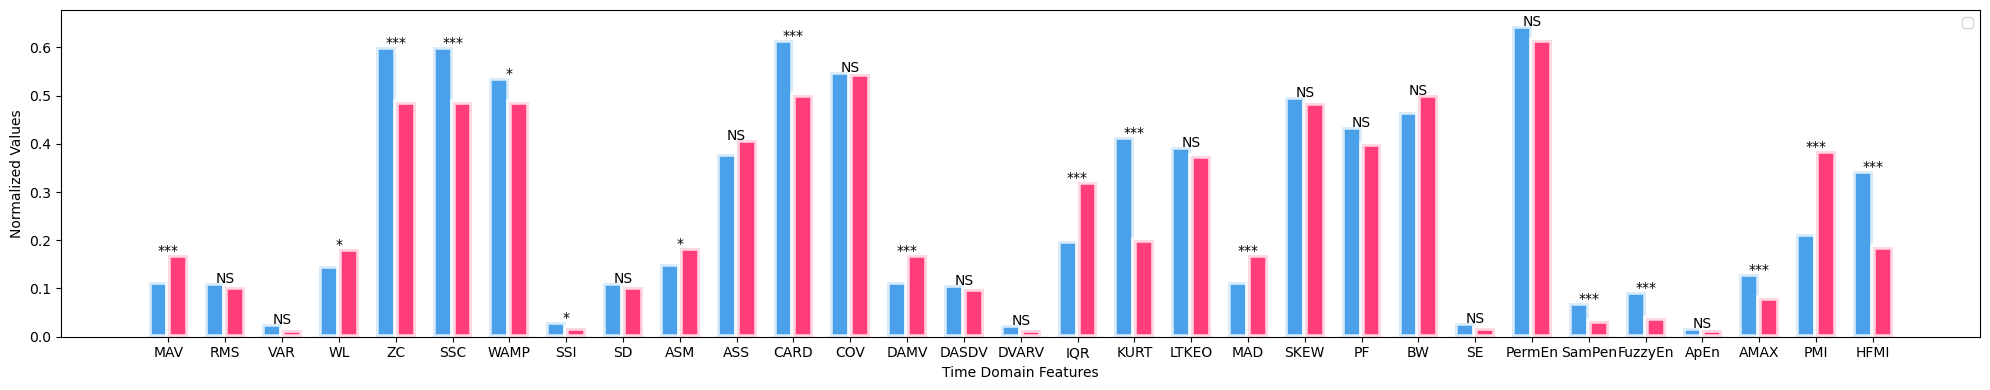

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

# 划分特征和标签
X = df_standard.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_standard.iloc[:, 0]

# 将数据分为两组：健康人群和 MI 人群
X_healthy = X[y == 0]
X_mi = X[y == 1]

# 计算每个组的特征统计数据（均值和标准差）
healthy_mean = np.mean(X_healthy, axis=0)
mi_mean = np.mean(X_mi, axis=0)
healthy_std = np.std(X_healthy, axis=0)
mi_std = np.std(X_mi, axis=0)

# 执行统计分析（双尾 t 检验）
t_statistic, p_values = stats.ttest_ind(X_healthy, X_mi, alternative='two-sided')

# 可视化比较结果
plt.figure(figsize=(20, 4))
bar_width = 0.35
index = np.arange(len(healthy_mean))

plt.bar(index, healthy_mean, bar_width,  alpha=0.8, color="#1e88e5", edgecolor='white', linewidth=4)  # 设置健康人群柱子颜色为蓝色，边框颜色为黑色
plt.bar(index + bar_width, mi_mean, bar_width,  alpha=0.8,color='#ff0d57', edgecolor='white', linewidth=4) 
# 标记显著性水平并打印p值
for i, p_value in enumerate(p_values):
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'NS'
    plt.text(index[i] + bar_width / 2, max(healthy_mean.iloc[i], mi_mean.iloc[i]), significance, ha='center')

    print(f"Feature '{df_standard.columns[i + 1]}': p-value = {p_value:}")

plt.xlabel('Time Domain Features')
plt.ylabel('Normalized Values')
# plt.title('Comparison of Feature Distribution between Healthy and MI Groups')
plt.xticks(index + bar_width / 2, df_standard.columns[1:])  # 设置 x 轴刻度
plt.legend()
plt.tight_layout()
plt.show()

## 时域

Feature 'MAV': p-value = 8.370351682812508e-05
Feature 'RMS': p-value = 0.4436255328235086
Feature 'VAR': p-value = 0.06463764812851076
Feature 'WL': p-value = 0.020551617947247466
Feature 'ZC': p-value = 2.8835046380305992e-08
Feature 'SSC': p-value = 3.782973465900741e-08
Feature 'WAMP': p-value = 0.011510854857404221
Feature 'SSI': p-value = 0.03365124929353092
Feature 'SD': p-value = 0.44361855974593734
Feature 'ASM': p-value = 0.019124925333621454
Feature 'ASS': p-value = 0.18142176229127138
Feature 'CARD': p-value = 7.757904588430025e-08
Feature 'COV': p-value = 0.7421187441195162
Feature 'DAMV': p-value = 0.00010346160498020302
Feature 'DASDV': p-value = 0.4393503392758058
Feature 'DVARV': p-value = 0.061135096908159985
Feature 'IQR': p-value = 3.4283743706712745e-09
Feature 'KURT': p-value = 3.316880697716457e-17
Feature 'LTKEO': p-value = 0.3297902544274244
Feature 'MAD': p-value = 8.370094264246628e-05
Feature 'SKEW': p-value = 0.3711141423612807


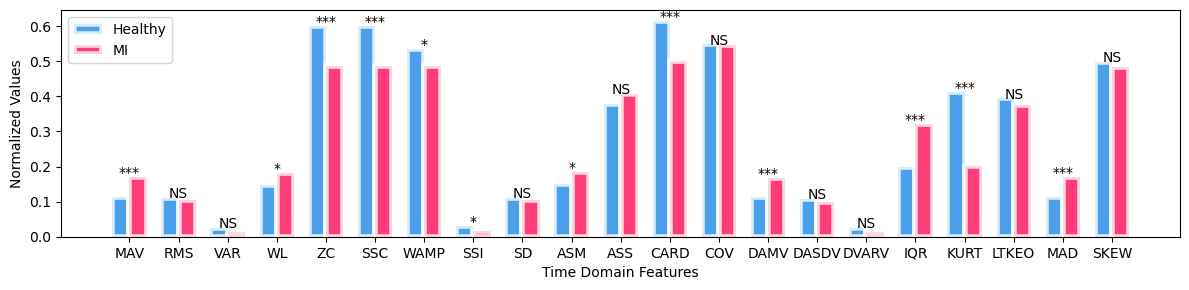

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

# 划分特征和标签
X = df_t.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_t.iloc[:, 0]

# 将数据分为两组：健康人群和 MI 人群
X_healthy = X[y == 0]
X_mi = X[y == 1]

# 计算每个组的特征统计数据（均值和标准差）
healthy_mean = np.mean(X_healthy, axis=0)
mi_mean = np.mean(X_mi, axis=0)
healthy_std = np.std(X_healthy, axis=0)
mi_std = np.std(X_mi, axis=0)

# 执行统计分析（双尾 t 检验）
t_statistic, p_values = stats.ttest_ind(X_healthy, X_mi, alternative='two-sided')

# 可视化比较结果
plt.figure(figsize=(12, 3))
bar_width = 0.35
index = np.arange(len(healthy_mean))

plt.bar(index, healthy_mean, bar_width, label='Healthy', alpha=0.8, color="#1e88e5", edgecolor='white', linewidth=4)  # 设置健康人群柱子颜色为蓝色，边框颜色为黑色
plt.bar(index + bar_width, mi_mean, bar_width, label='MI', alpha=0.8,color='#ff0d57', edgecolor='white', linewidth=4) 

# 标记显著性水平并打印p值
for i, p_value in enumerate(p_values):
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'NS'
    plt.text(index[i] + bar_width / 2, max(healthy_mean.iloc[i], mi_mean.iloc[i]), significance, ha='center')

    print(f"Feature '{df_t.columns[i + 1]}': p-value = {p_value:}")

plt.xlabel('Time Domain Features')
plt.ylabel('Normalized Values')
# plt.title('Comparison of Feature Distribution between Healthy and MI Groups')
plt.xticks(index + bar_width / 2, df_t.columns[1:])  # 设置 x 轴刻度
plt.legend()
plt.tight_layout()
plt.savefig('Time.jpg', dpi=600)  # 保存为PNG格式，分辨率为300dpi
plt.show()

## 频域

Feature 'PF': p-value = 0.15703185585947646
Feature 'BW': p-value = 0.1812089601195608
Feature 'SE': p-value = 0.06332159181296336


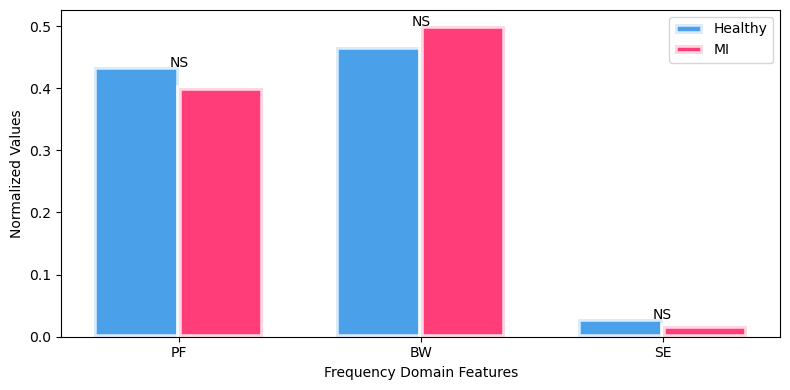

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

# 划分特征和标签
X = df_f.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_f.iloc[:, 0]

# 将数据分为两组：健康人群和 MI 人群
X_healthy = X[y == 0]
X_mi = X[y == 1]

# 计算每个组的特征统计数据（均值和标准差）
healthy_mean = np.mean(X_healthy, axis=0)
mi_mean = np.mean(X_mi, axis=0)
healthy_std = np.std(X_healthy, axis=0)
mi_std = np.std(X_mi, axis=0)

# 执行统计分析（双尾 t 检验）
t_statistic, p_values = stats.ttest_ind(X_healthy, X_mi, alternative='two-sided')

# 可视化比较结果
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = np.arange(len(healthy_mean))

plt.bar(index, healthy_mean, bar_width, label='Healthy', alpha=0.8, color="#1e88e5", edgecolor='white', linewidth=4)  # 设置健康人群柱子颜色为蓝色，边框颜色为黑色
plt.bar(index + bar_width, mi_mean, bar_width, label='MI', alpha=0.8,color='#ff0d57', edgecolor='white', linewidth=4) 

# 标记显著性水平并打印p值
for i, p_value in enumerate(p_values):
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'NS'
    plt.text(index[i] + bar_width / 2, max(healthy_mean.iloc[i], mi_mean.iloc[i]), significance, ha='center')

    print(f"Feature '{df_f.columns[i + 1]}': p-value = {p_value:}")

plt.xlabel('Frequency Domain Features')
plt.ylabel('Normalized Values')
# plt.title('Comparison of Feature Distribution between Healthy and MI Groups')
plt.xticks(index + bar_width / 2, df_f.columns[1:])  # 设置 x 轴刻度
plt.legend()
plt.tight_layout()
plt.savefig('Fre.jpg', dpi=600)  # 保存为PNG格式，分辨率为300dpi
plt.show()

## 非线性

Feature 'PermEn': p-value = 0.21961117174655348
Feature 'SamPen': p-value = 0.0002651893408615631
Feature 'FuzzyEn': p-value = 3.158070432293227e-06
Feature 'ApEn': p-value = 0.5615968088825372


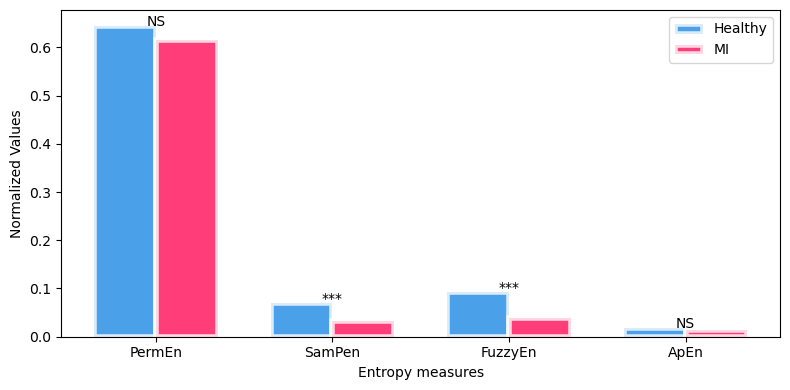

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

# 划分特征和标签
X = df_s.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_s.iloc[:, 0]

# 将数据分为两组：健康人群和 MI 人群
X_healthy = X[y == 0]
X_mi = X[y == 1]

# 计算每个组的特征统计数据（均值和标准差）
healthy_mean = np.mean(X_healthy, axis=0)
mi_mean = np.mean(X_mi, axis=0)
healthy_std = np.std(X_healthy, axis=0)
mi_std = np.std(X_mi, axis=0)

# 执行统计分析（双尾 t 检验）
t_statistic, p_values = stats.ttest_ind(X_healthy, X_mi, alternative='two-sided')

# 可视化比较结果
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = np.arange(len(healthy_mean))

plt.bar(index, healthy_mean, bar_width, label='Healthy', alpha=0.8, color="#1e88e5", edgecolor='white', linewidth=4)  # 设置健康人群柱子颜色为蓝色，边框颜色为黑色
plt.bar(index + bar_width, mi_mean, bar_width, label='MI', alpha=0.8,color='#ff0d57', edgecolor='white', linewidth=4) 

# 标记显著性水平并打印p值
for i, p_value in enumerate(p_values):
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'NS'
    plt.text(index[i] + bar_width / 2, max(healthy_mean.iloc[i], mi_mean.iloc[i]), significance, ha='center')

    print(f"Feature '{df_s.columns[i + 1]}': p-value = {p_value:}")

plt.xlabel('Entropy measures')
plt.ylabel('Normalized Values')
# plt.title('Comparison of Feature Distribution between Healthy and MI Groups')
plt.xticks(index + bar_width / 2, df_s.columns[1:])  # 设置 x 轴刻度
plt.legend()
plt.tight_layout()
plt.savefig('shang.jpg', dpi=600)  # 保存为PNG格式，分辨率为300dpi
plt.show()

## 形态学特征

Feature 'AMAX': p-value = 1.2928617604923149e-08
Feature 'PMI': p-value = 5.503415642949428e-11
Feature 'HFMI': p-value = 7.538562651335298e-14


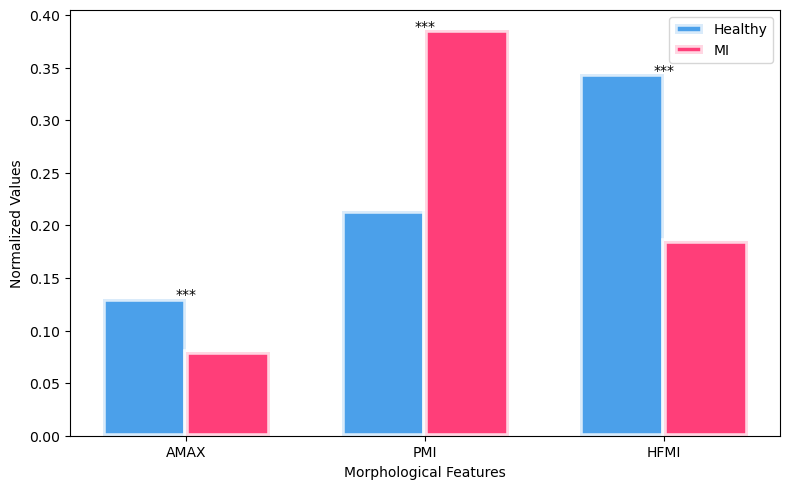

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

# 划分特征和标签
X = df_x.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_x.iloc[:, 0]

# 将数据分为两组：健康人群和 MI 人群
X_healthy = X[y == 0]
X_mi = X[y == 1]

# 计算每个组的特征统计数据（均值和标准差）
healthy_mean = np.mean(X_healthy, axis=0)
mi_mean = np.mean(X_mi, axis=0)
healthy_std = np.std(X_healthy, axis=0)
mi_std = np.std(X_mi, axis=0)

# 执行统计分析（双尾 t 检验）
t_statistic, p_values = stats.ttest_ind(X_healthy, X_mi, alternative='two-sided')

# 可视化比较结果
plt.figure(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(healthy_mean))

plt.bar(index, healthy_mean, bar_width, label='Healthy', alpha=0.8, color="#1e88e5", edgecolor='white', linewidth=4)  # 设置健康人群柱子颜色为蓝色，边框颜色为黑色
plt.bar(index + bar_width, mi_mean, bar_width, label='MI', alpha=0.8,color='#ff0d57', edgecolor='white', linewidth=4)  # 设置MI人群柱子颜色为红色，边框颜色为黑色

# 标记显著性水平并打印p值
for i, p_value in enumerate(p_values):
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'NS'
    plt.text(index[i] + bar_width / 2, max(healthy_mean.iloc[i], mi_mean.iloc[i]), significance, ha='center')

    print(f"Feature '{df_x.columns[i + 1]}': p-value = {p_value:}")

plt.xlabel('Morphological Features')
plt.ylabel('Normalized Values')
# plt.title('Comparison of Feature Distribution between Healthy and MI Groups')
plt.xticks(index + bar_width / 2, df_x.columns[1:])  # 设置 x 轴刻度
plt.legend()
plt.tight_layout()
plt.savefig('xintai.jpg', dpi=600)  # 保存为PNG格式，分辨率为300dpi
plt.show()

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
